In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from collections import Counter
from functools import partial, reduce
import math

# Chap 3: Visualizing Data

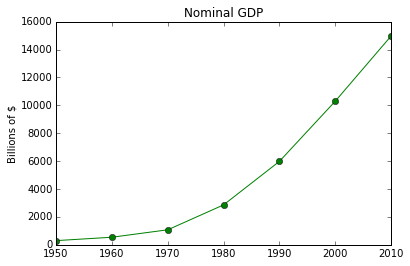

In [2]:
years = [1950, 1960, 1970, 1980, 1990, 2000, 2010]
gdp = [300.2, 543.3, 1075.9, 2862.5, 5979.6, 10289.7, 14958.3]

plt.plot( years, gdp, color='green', marker='o', linestyle='solid')
plt.title('Nominal GDP')
plt.ylabel('Billions of $')
plt.show()

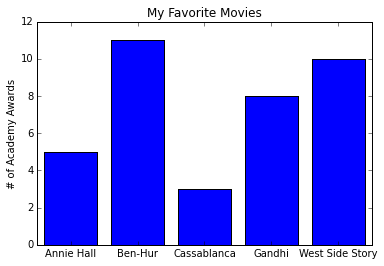

In [3]:
movies = ['Annie Hall', 'Ben-Hur', 'Cassablanca', 'Gandhi', 'West Side Story']
num_oscars = [5, 11, 3, 8, 10]

xs = [i + 0.1 for i, _ in enumerate(movies)]

plt.bar(xs, num_oscars)
plt.ylabel("# of Academy Awards")
plt.title('My Favorite Movies')
plt.xticks([i + 0.5 for i, _ in enumerate(movies)], movies)
plt.show()

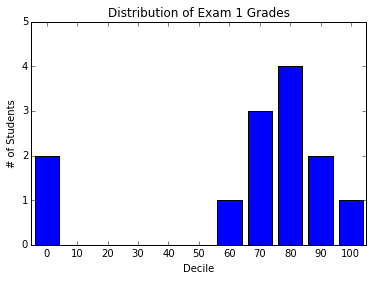

In [4]:
grades = [83, 95, 91, 87, 70, 0, 85, 82, 100, 67, 73, 77, 0]
decile = lambda grade: grade//10 * 10
histogram = Counter(decile(grade) for grade in grades)

plt.bar([x - 4 for x in histogram.keys()], 
       histogram.values(),
       8)
plt.axis([-5, 105, 0, 5])
plt.xticks([10 * i for i in range(11)])
plt.xlabel('Decile')
plt.ylabel('# of Students')
plt.title('Distribution of Exam 1 Grades')
plt.show()

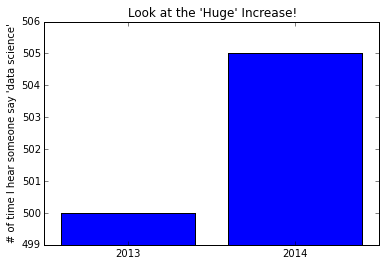

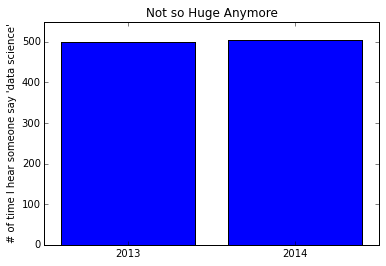

In [5]:
mentions=[500, 505]
years = [2013, 2014]

plt.bar([2012.6, 2013.6], mentions, 0.8)
plt.xticks(years)
plt.ylabel("# of time I hear someone say 'data science'")
plt.ticklabel_format(useOffset=False)
plt.axis([2012.5, 2014.5, 499, 506])
plt.title("Look at the 'Huge' Increase!")
plt.show()

plt.bar([2012.6, 2013.6], mentions, 0.8)
plt.xticks(years)
plt.ylabel("# of time I hear someone say 'data science'")
plt.ticklabel_format(useOffset=False)
plt.axis([2012.5, 2014.5, 0, 550])
plt.title("Not so Huge Anymore")
plt.show()

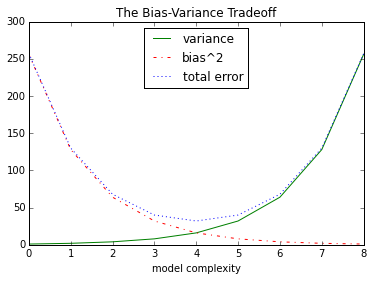

In [6]:
variance = [1, 2, 4, 8, 16, 32, 64, 128, 256]
bias_squared = [256, 128, 64, 32, 16, 8, 4, 2, 1]
total_error = [x + y for x, y in zip(variance, bias_squared)]
xs = [i for i, _ in enumerate(variance)]

plt.plot(xs, variance, 'g-', label='variance')
plt.plot(xs, bias_squared, 'r-.', label='bias^2')
plt.plot(xs, total_error, 'b:', label='total error')

plt.legend(loc=9)
plt.xlabel('model complexity')
plt.title('The Bias-Variance Tradeoff')
plt.show()

C:\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


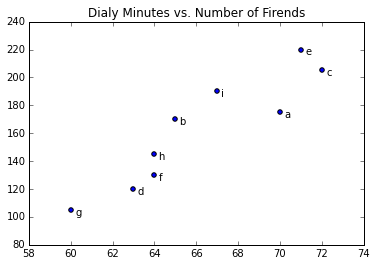

In [7]:
friends = [70, 65, 72, 63, 71, 64, 60, 64, 67]
minutes = [175, 170, 205, 120, 220, 130, 105, 145, 190]
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']

plt.scatter(friends, minutes)
for label, friend_count, minute_count in zip(labels, friends, minutes):
    plt.annotate(label,
                xy=(friend_count, minute_count),
                 xytext=(5, -5),
                 textcoords='offset points')
plt.title('Dialy Minutes vs. Number of Firends')
plt.show()

C:\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


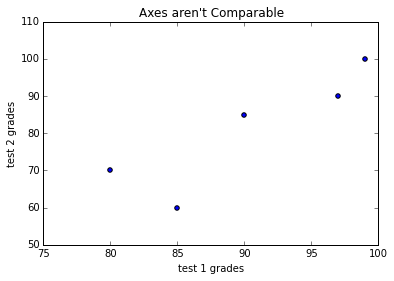

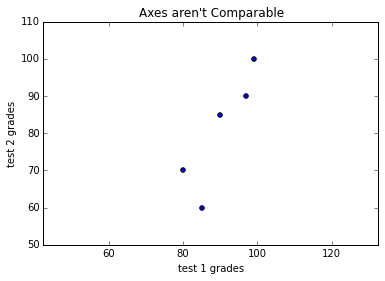

In [8]:
test_1_grades = [99, 90, 85, 97, 80]
test_2_grades = [100, 85, 60, 90, 70]

plt.scatter(test_1_grades, test_2_grades)
plt.title("Axes aren't Comparable")
plt.xlabel("test 1 grades")
plt.ylabel("test 2 grades")
plt.show()

plt.scatter(test_1_grades, test_2_grades)
plt.title("Axes aren't Comparable")
plt.xlabel("test 1 grades")
plt.ylabel("test 2 grades")
plt.axis('equal')
plt.show()

# Chap 4: Linear Algebra

## Functions

In [9]:
#Vectors
def vector_add(v, w):
    """adds corresponding elements"""
    return [v_i + w_i
          for v_i, w_i in zip(v, w)]

def vector_subtraction(v, w):
    """subtracts corresponding elements"""
    return [v_i - w_i
          for v_i, w_i in zip(v, w)]

def vector_sum(vectors):
    """sums all corresponding elements"""
    results = vectors[0]
    for vector in vectors[1:]:
        results = vector_add(results, vector)
    return results
def vector_sum(vectors):
    """adds corresponding elements"""
    return reduce(vector_add, vectors)
vector_sum = partial(reduce, vector_add)

def sclar_multiply(c, v):
    """c is anumber, v is a vector"""
    return [c * v_i for v_i in v]

def vector_mean(vectors):
    """compute the vector whose ith element is the mean of the ith elements of the input vectors"""
    n = len(vectors)
    return scalar_multiply(1/n, vector_sum(vectors))

def dot(v, w):
    """v_1 * w_1 + ... + v_n * w_n"""
    return sum(v_i * w_i
               for v_i, w_i in zip(v, w))

def sum_of_squares(v):
    """v_1 * v_1 + ... + v_n * v_n"""
    return dot(v, v)

def magnitude(v):
    return math.sqrt(sum_of_squares(v))

def squared_distance(v, w):
    """(v_1 - w_1) ** 2 + ... + (v_n - w_n) ** 2"""
    return sum_of_squares(vector_subtract(v, w))

def distance(v, w):
    return math.sqrt(squared_distance(v, w))
def distance(v, w):
    return magnitude(vector_subtraction(v, w))

#Matrices
def shape(A):
    num_rows = len(A)
    num_cols = len(A[0]) if A else 0
    return num_rows, num_cols

def get_row(A, i):
    return A[i]

def get_column(A, j):
    return [A_i[j] 
            for A_i in A]

def make_matrix(num_rows, num_cols, entry_fn):
    """returns a num_rows x num_cols matrix
    whose (i,j)th entry is entry_fn(i, j)"""
    return [[entry_fn(i, j)
            for j in range(num_cols)]
             for i in range(num_rows)]

def is_diagonal(i, j):
    """1's on the 'diagonal', 0's everywhere else"""
    return 1 if i == j else 0



## Examples

In [10]:
identity_matrix = make_matrix(5, 5, is_diagonal); identity_matrix

[[1, 0, 0, 0, 0],
 [0, 1, 0, 0, 0],
 [0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0],
 [0, 0, 0, 0, 1]]

In [11]:
friendships = [(0,1), (0,2), (1,2), (1,3), (2,3), (3,4), (4,5), (5,6), (5,7), (6,8), (7,8), (8,9)]
num_users = len(set([item for sublist in friendships for item in sublist]))

def is_friend(i, j):
    return 1 if any([(i, j) in friendships,  (j, i) in friendships]) else 0

friendship_matrix = make_matrix(num_users, num_users, is_friend); friendship_matrix

[[0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 1, 1, 0, 0, 0, 0, 0, 0],
 [1, 1, 0, 1, 0, 0, 0, 0, 0, 0],
 [0, 1, 1, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 1, 1, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 1, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 1, 1, 0, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]]

In [12]:
def friends_of(friendships, user):
    return [i
        for i, friend in enumerate(friendships[user])
            if friend]

friends_of(friendship_matrix, 5)

[4, 6, 7]

# Chap 5: Statistics

In [13]:
def mean(x):
    return sum(x)/len(x)

def median(v):
    """finds the 'middle-most' value of v"""
    n = lev(v)
    sorted_v = sorted(v)
    midpoint = n // 2
    
    if n % 2 == 1:
        # if odd, return th emiddle value
        return sorted_v[midpoint]
    else:
        # if even, return the average of the middle values
        lo = midpoint -1
        hi = midpoint
        return (sorted_v[lo] + sorted_v[hi]) / 2
    
def quantile(x, p):
    """returns the pth-percentile value in x"""
    p_index = int(p * len(x))
    return sorted(x)[p_index]

def mode(x):
    """returns a list, might be more than one mode"""
    counts = Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.iteritems()
           if count == max_count]

def data_range(x):
    return max(x) - min(x)

def de_mean(x):
    """translate x by subtracting its mean (so the result has mean 0)"""
    x_bar = mean(x)
    return [x_i - x_bar for x_i in x]

def variance(x):
    """assumes x has at least two elements"""
    n = len(x)
    deviations = de_mean(x)
    return sum_of_squares(deviations) / (n - 1)

def standard_deviation(x):
    return math.sqrt(variance(x))

def interquartile_range(x):
    return quantile(x, 0.75) - quantile(x, 0.25)

def covariance(x, y):
    n = len(x)
    return dot(de_mean(x), de_mean(y)) / (n - 1)

def correlation(x, y):
    stdev_x = standard_deviation(x)
    stdev_y = standard_deviation(y)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(x, y) / stdev_x / stdev_y
    else:
        return 0

# Chap 6: Probability

In [14]:
import random

def random_kid():
    return random.choice(["boy", "girl"])

both_girls = 0
older_girl = 0
either_girl = 0

random.seed(0)
for _ in range(10000):
    younger = random_kid()
    older = random_kid()
    if older == "girl":
        older_girl += 1
    if older == "girl" and younger == "girl":
        both_girls += 1
    if older == "girl" or younger == "girl":
        either_girl += 1
        
print("P(both | older):", both_girls/older_girl)
print("P(both | either):", both_girls/either_girl)

P(both | older): 0.5007089325501317
P(both | either): 0.3311897106109325


In [15]:
def uniform_pdf(x):
    return 1 if x >= 0 and x <1 else 0

def uniform_cdf(x):
    "returns the probability that a uniform random variable is <= x"
    if x < 0: return 0
    elif x < 1: return x
    else: return 1

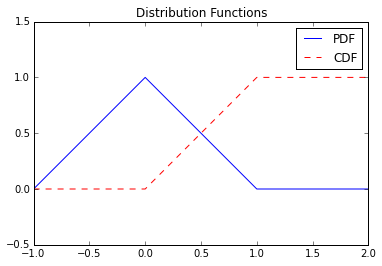

In [16]:
xs = list(range(-1, 3, 1))
plt.plot(xs, [uniform_pdf(x) for x in xs], 'b-', label='PDF')
plt.plot(xs, [uniform_cdf(x) for x in xs], 'r--', label='CDF')

plt.legend()
plt.axis([-1, 2, -0.5, 1.5])
plt.title('Distribution Functions')
plt.show()

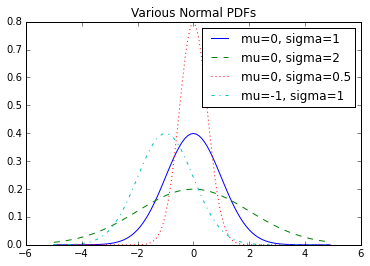

In [17]:
def normal_pdf(x, mu=0, sigma=1):
    sqrt_two_pi = math.sqrt(2 * math.pi)
    return (math.exp(-(x-mu) ** 2 / 2 / sigma ** 2)/ (sqrt_two_pi * sigma))

xs = [x/10.0 for x in range(-50, 50)]
plt.plot(xs, [normal_pdf(x, sigma=1) for x in xs], '-', label='mu=0, sigma=1')
plt.plot(xs, [normal_pdf(x, sigma=2) for x in xs], '--', label='mu=0, sigma=2')
plt.plot(xs, [normal_pdf(x, sigma=0.5) for x in xs], ':', label='mu=0, sigma=0.5')
plt.plot(xs, [normal_pdf(x, mu=-1) for x in xs], '-.', label='mu=-1, sigma=1')
plt.legend()
plt.title('Various Normal PDFs')
plt.show()

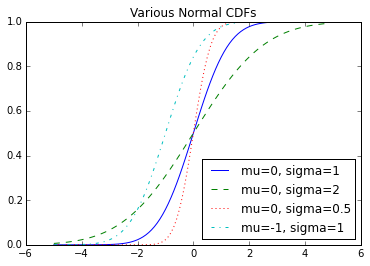

In [18]:
def normal_cdf(x, mu=0, sigma=1):
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma))/2

xs = [x/10.0 for x in range(-50, 50)]
plt.plot(xs, [normal_cdf(x, sigma=1) for x in xs], '-', label='mu=0, sigma=1')
plt.plot(xs, [normal_cdf(x, sigma=2) for x in xs], '--', label='mu=0, sigma=2')
plt.plot(xs, [normal_cdf(x, sigma=0.5) for x in xs], ':', label='mu=0, sigma=0.5')
plt.plot(xs, [normal_cdf(x, mu=-1) for x in xs], '-.', label='mu=-1, sigma=1')
plt.legend(loc=4)
plt.title('Various Normal CDFs')
plt.show()

In [19]:
def inverse_normal_cdf(p, mu=0, sigma=1, tolerance=0.00001):
    """ find approximate inverse using binary search"""
    
    if mu != 0 and sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)
    
    low_z, low_p = -10.0, 0
    hi_z, hi_p = 10.0, 1
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z)/2
        mid_p = normal_cdf(mid_z)
        if mid_p < p:
            low_z, low_p = mid_z, mid_p
        elif mid_p > p:
            hi_z, hi_p = mid_z, mid_p
        else:
            break
        
    return mid_z
    
inverse_normal_cdf(0.25)

-0.6744861602783203

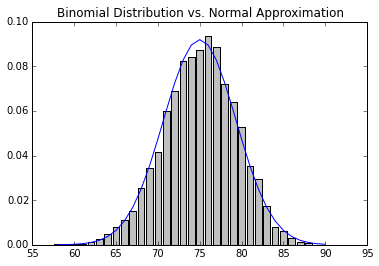

In [20]:
def bernoulli_trial(p):
    return 1 if random.random() < p else 0

def binomial(n, p):
    return sum(bernoulli_trial(p) for _ in range(n))

def make_hist(p, n, num_points):
    data = [binomial(n, p) for _ in range(num_points)]
    
    histogram = Counter(data)
    plt.bar([x - 0.4 for x in histogram.keys()],
           [v / num_points for v in histogram.values()],
           0.8,
           color='0.75')
    
    mu = p*n
    sigma = math.sqrt(n * p *(1-p))
    
    xs = range(min(data), max(data) + 1)
    ys = [normal_cdf(i + 0.5, mu, sigma) - normal_cdf(i - 0.5, mu, sigma) for i in xs]
    plt.plot(xs, ys)
    plt.title('Binomial Distribution vs. Normal Approximation')
    plt.show()
    
make_hist(0.75, 100, 10000)

# Chap 7: Hypothesis and Inference

In [21]:
def normal_approximation_to_binomial(n, p):
    """finds mu and sigma corresponding to a Binomial(n, p)"""
    mu = p * n
    sigma = math.sqrt(p * (1 - p ) * n)
    return mu, sigma

def normal_probability_below(hi, mu = 0, sigma = 0):
    return normal_cdf(hi, mu, sigma)

def normal_probability_above(lo, mu=0, sigma=1):
    return 1 - normal_cdf(lo, mu, sigma)

def normal_probability_between(lo, hi, mu=0, sigma=1):
    return normal_cdf(hi, mu, sigma) - normal_cdf(lo, mu, sigma)

def normal_probability_outside(lo, hi, mu=0, sigma=1):
    return 1 - normal_probability_between(lo, hi, mu, sigma)

def normal_upper_bound(probability, mu=0, sigma=1):
    """tertuns the z for which P(Z <= z) = probability"""
    return inverse_normal_cdf(probability, mu, sigma)

def normal_lower_bound(probability, mu=0, sigma=1):
    """tertuns the z for which P(Z >= z) = probability"""
    return inverse_normal_cdf(1- probability, mu, sigma)

def normal_two_sided_bounds(probability, mu=0, sigma=1):
    """returns the symmetric (about the mean) bounds that contain the specified probability"""
    tail_probability = (1- probability) / 2
    #upper bound should have tail_probability above it
    upper_bound = normal_lower_bound(tail_probability, mu, sigma)
    
    # lower bound should have tail_probabilty below it
    lower_bound = normal_upper_bound(tail_probability, mu, sigma)
    
    return lower_bound, upper_bound

In [22]:
mu_0, sigma_0 = normal_approximation_to_binomial(1000, 0.5)
mu_0, sigma_0

(500.0, 15.811388300841896)

In [23]:
lo, hi = normal_two_sided_bounds(0.95, mu_0, sigma_0)
print(lo, hi)

mu_1, sigma_1 = normal_approximation_to_binomial(1000, 0.55)

type_2_probability = normal_probability_between(lo, hi, mu_1, sigma_1)
power = 1 - type_2_probability
print(power)

469.01026640487555 530.9897335951244
0.8865480012953671


In [24]:
hi = normal_upper_bound( 0.95, mu_0, sigma_0)
print(hi)

type_2_probability = normal_probability_below(hi, mu_1, sigma_1)
power = 1 - type_2_probability
print(power)

526.0073585242053
0.9363794803307173


In [25]:
def two_sided_p_value(x, mu=0, sigma=1):
    if x >= mu:
        # if x is greater than the mean, the tail is what's greater than x
        return 2 * normal_probability_above(x, mu, sigma)
    else:
        # if x is less than the mean, the tail is what's less than x
        return 2 * normal_probability_below(x, mu, sigma)
    
two_sided_p_value(529.5, mu_0, sigma_0)

0.06207721579598857

In [26]:
extreme_value_count = 0
for _ in range(100000):
    num_heads = sum(1 if random.random() < 0.5 else 0
                    for _ in range(1000))
    if num_heads >= 530 or num_heads <= 470:
        extreme_value_count += 1

print(extreme_value_count / 100000)

0.06249


In [27]:
two_sided_p_value(531.5, mu_0, sigma_0)

0.046345287837786575

In [28]:
def upper_p_value(x, mu=0, sigma=1):
     return normal_probability_above(x, mu, sigma)
        
def lower_p_value(x, mu=0, sigma=1):
     return normal_probability_below(x, mu, sigma)
        
print(upper_p_value(524.5, mu_0, sigma_0))
print(upper_p_value(526.5, mu_0, sigma_0))

0.06062885772582083
0.04686839508859242


## Confidence Intervals

In [29]:
p_hat = 525 / 1000
mu = p_hat
sigma = math.sqrt(p_hat * (1 - p_hat) / 1000); print(sigma)
normal_two_sided_bounds(0.95, mu, sigma)

0.015791611697353755


(0.4940490278129096, 0.5559509721870904)

In [30]:
p_hat = 540 / 1000
mu = p_hat
sigma = math.sqrt(p_hat * (1 - p_hat) / 1000); print(sigma)
normal_two_sided_bounds(0.95, mu, sigma)

0.015760710643876435


(0.5091095927295919, 0.5708904072704082)

## P-Hacking

In [31]:
def run_experiment():
    """flip a fair coin 1000 times, True = heads, False = tails"""
    return [random.random() < 0.5 for _ in range(1000)]

def reject_fairness(experiment):
    """using the 5% significance levels"""
    num_heads = len([flip for flip in experiment if flip])
    return num_heads < 469 or num_heads > 531

random.seed(0)
experiments = [run_experiment() for _ in range(1000)]
num_rejections = len([experiment
                     for experiment in experiments
                     if reject_fairness(experiment)])
print(num_rejections)

46


In [32]:
def estimate_parameters(N, n):
    p = n / N
    sigma = math.sqrt(p * (1 - p) / N)
    return p, sigma

def a_b_test_statistics(N_A, n_A, N_B, n_B):
    p_A, sigma_A = estimate_parameters(N_A, n_A)
    p_B, sigma_B = estimate_parameters(N_B, n_B)
    return (p_B - p_A)/math.sqrt(sigma_A ** 2 + sigma_B ** 2)

In [33]:
z = a_b_test_statistics(1000, 200, 1000, 180); print(z)
two_sided_p_value(z)

-1.1403464899034472


0.254141976542236

In [34]:
z = a_b_test_statistics(1000, 200, 1000, 150); print(z)
two_sided_p_value(z)

-2.948839123097944


0.003189699706216853

## Bayesian Inferences

In [35]:
def B(alpha, beta):
    """a normalizing constant so that the total probability is 1"""
    return math.gamma(alpha) * math.gamma(beta) / math.gamma(alpha + beta)

def beta_pdf(x, alpha, beta):
    if x < 0 or x > 1:
        return 0
    return x ** (alpha - 1) * (1 - x) ** (beta - 1) / B(alpha, beta)

# Chap 8. Gradient Descent

In [36]:
%matplotlib inline
from matplotlib import pyplot as plt
from collections import Counter
from functools import partial, reduce
import math
import random

In [37]:
def sum_of_squares(v):
    """computes the sum of squared elements in v"""
    return sum(v_i ** 2 for v_i in v)

def difference_quotient(f, x, h):
    return (f(x + h) - f(x)) / h

def square(x):
    return x * x

def derivative(x):
    return 2 * x

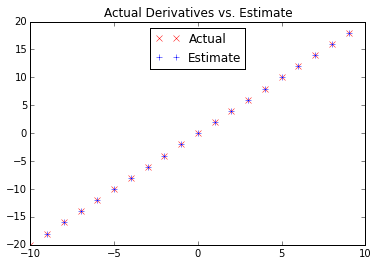

In [38]:
derivative_estimate = partial(difference_quotient, square, h=0.00001)

x = range(-10, 10)
plt.title("Actual Derivatives vs. Estimate")
plt.plot(x, list(map(derivative, x)), 'rx', label="Actual")
plt.plot(x, list(map(derivative_estimate, x)), 'b+', label="Estimate")
plt.legend(loc=9)
plt.show()

In [39]:
def partial_difference_quotient(f, v, i, h):
    """compute the ith partial difference quotient of f at v"""
    w = [v_j + (h if j == i else 0)
        for j, v_j in enumerate(v)]
    
    return (f(w) - f(v))/h

def estimate_gradient(f, v, h=0.00001):
    return [parital_difference_quotient(f, v, i, h)
           for i, _ in enumerate(v)]

In [40]:
def step(v, direction, step_size):
    """move step_size in the direction from v"""
    return [v_i + step_size * direction_i 
           for v_i, direction_i in zip(v, direction)]

def sum_of_squares_gradient(v):
    return [2 * v_i for v_i in v]

v = [random.randint(-10, 10) for i in range(3)]

tolerance = 0.0000001

while True:
    gradient = sum_of_squares_gradient(v)
    next_v = step(v, gradient, -0.01)
    if distance(next_v, v) < tolerance:
        break
    v = next_v
    
print(v)

[4.5336994434236267e-07, -2.720219666054177e-06, -4.080329499081268e-06]


In [41]:
step_sizes = [ 100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001]

def safe(f):
    """return a new function that's the same as f,
    except that it outputs infinity whenever f produces an error"""
    def safe_f(*args, **kwargs):
        try:
            return f(*args, ** kwargs)
        except:
            return float('inf')
    return safe_f

In [42]:
def minimize_batch(target_fn, gradient_fn, theta_0, tolerance=0.0000001):
    """use gradient decent to find theta that minimizes target function"""
    
    step_sizes = [ 100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001]
    
    theta = theta_0
    target_fn = safe(target_fn)
    value = target_fn(theta)
    
    while True:
        gradient = gradient_fn(theta)
        next_thetas = [step(theta, gradient, -step_size)
                     for step_size in step_sizes]
        next_theta = min(next_thetas, key=target_fn)
        next_value = target_fn(next_theta)
        
        if abs(value - next_value) < tolerance:
            return theta
        else:
            theta, value = next_theta, next_value
                    
def negate(f):
    """return a function that for any input x returns -f(x)"""
    return lambda *args, **kwargs:  -f(*args, **kwargs)

def negate_all(f):
    """the same when f returns a list of numbers"""
    return lambda *args, **kwargs: [-y for y in f(*args, **kwargs)]

def maximize_batch(target_fn, gradient_fn, theta_0, tolerance=0.0000001):
    return minimize_batch(negate(target_fn), negate_all(gradient_fn), theta_0, tolerance)

In [43]:
def in_random_order(data):
    """generator that returns the elements of data in random order"""
    indexes = [i for i, _ in enumerate(data)]
    random.shuffle(indexes)
    
    for i in indexes:
        yield data[i]

def minimize_stochastic(target_fn, gradient_fn, x, y, theta_0, alpha_0=0.01):
    
    data = zip(x, y)
    theta = theta_0
    alpha = alpha_0
    min_theta, min_value = None, float('inf')
    iterations_with_no_improvement = 0
    
    while iterations_with_no_improvement < 100:
        value = sum(target_fn(x_i, y_i, theta) for x_i, y_i in data)
        
        if value < min_value:
            min_theta, min_value = theta, value
            iterations_with_no_improvement = 0
            alpha = alpha_0
        else:
            iterations_with_no_improvement += 1
            alpha *= 0.9
        
        for x_i, y_i in in_random_order(data):
            gradient_i = gradient_fn(x_i, y_i, theta)
            theta = vector_subtraction(theta, scalar_multiply(alpha, gradient_i))
    
    return min_theta

def maximize_stochastic(target_fn, gradient_fn, x, y, theta_0, alpha_0=0.01):
    return minimize_stochastic(negate(target_fn), 
                              negate_all(gradient_fn),
                              x, y, theta_0, alpha_0)

# Chap 9. Getting Data

## stdin and stdout

In [44]:
%%writefile egrep.py

import sys, re

#sys.argv is the list of command-line arguments
#sys.argv[0] is the name of the program itself
#sys.argv[1] will be the regex specified at the command line

regex = sys.argv[1]

#for every line passed into the script
for line in sys.stdin:
    #if it matches the regex, write it to stdout
    if re.search(regex, line):
        sys.stdout.write(line)

Overwriting egrep.py


In [45]:
%%writefile line_count.py
import sys

count = 0
for line in sys.stdin:
    count += 1
    
#print goes to sys.stdout
print(count)

Overwriting line_count.py


In windows the command to run files would be:  
type SomeFile.txt | python egrep.py "[0-9}' | python line_count.py  

In Unix:  
cat SomeFile.txt | python egrep.py "[0-9}' | python line_count.py 

In [46]:
%%writefile most_common_words.py
import sys
from collections import Counter

#pass in number of words as first argument
try:
    num_words = int(sys.arg[1])
except: 
    print("usage: most_common_words.py num_words")
    sys.exit(1) #non-zero exit code indicates error

counter = Counter(word.lower()
                 for line in sys.stdin()
                 for word in line.strip().split()
                 if word)

for word, count in counter.most_common(num_words):
    sys.stdout.write(str(count))
    sys.stdout.write("\t")
    sys.stdout.write(word)
    sys.stdout.write("\n")

Overwriting most_common_words.py


C:\DataScience>type the_bible.txt | python most_common_words.py 10

## Reading Files
### The Basic Text Files

'r' means read-only  
file_for_reading = open('reading_file.txt', 'r')  

'w' is write -- will destroy the file if it already exisits!  
file_for_writing = open('writing_file.txt', 'w')  

'a' is append -- for adding to the end of the file  
file_for_appending = open('appending_file.txt', 'a')  

file_for_writing.close()

In [47]:
"""
with open(filename, 'r') as f:
    data = function_that _gets_data_from(f)
# at this point f has already been closed, so don't try to use it    
process(data)
"""

"\nwith open(filename, 'r') as f:\n    data = function_that _gets_data_from(f)\n# at this point f has already been closed, so don't try to use it    \nprocess(data)\n"

In [48]:
"""
starts_with_hash = 0

with open('input.txt', 'r') as f:
    for line in file:
        if re.match("^#", line):
            starts_with_hash += 1
            """

'\nstarts_with_hash = 0\n\nwith open(\'input.txt\', \'r\') as f:\n    for line in file:\n        if re.match("^#", line):\n            starts_with_hash += 1\n            '

In [49]:
def get_domain(email_address):
    """split on '@' and return the last piece"""
    return email_address.lower().split('@')[-1]

"""
with open('email_adress.txt', 'r') as f:
    domain_counts = Counter(get_domain(line.strip())
                           for line in f
                           if "@" in line)
                           """

'\nwith open(\'email_adress.txt\', \'r\') as f:\n    domain_counts = Counter(get_domain(line.strip())\n                           for line in f\n                           if "@" in line)\n                           '

### Delimited Files

In [50]:
"""
import csv

with open('tab_delimited_stock_prices.txt', 'rb') as f:
    reader = csv.reader(f, delimiter='\t')
    for row in reader:
        date = row[0]
        symbol = row[1]
        closing_price = float(row[2])
        process(date, symbol, closing_price)
        """

"\nimport csv\n\nwith open('tab_delimited_stock_prices.txt', 'rb') as f:\n    reader = csv.reader(f, delimiter='\t')\n    for row in reader:\n        date = row[0]\n        symbol = row[1]\n        closing_price = float(row[2])\n        process(date, symbol, closing_price)\n        "

In [51]:
"""
with open('colon_delimited_stock_prices.txt', 'rb') as f:
    reader = csv.DictReader(f, delimiter=':')
    for row in reader:
        data = row["data"]
        symbol = row["symbol"]
        closing_price = float(row["closing_price"])
        process(date, symbol, closing_price)
        """

'\nwith open(\'colon_delimited_stock_prices.txt\', \'rb\') as f:\n    reader = csv.DictReader(f, delimiter=\':\')\n    for row in reader:\n        data = row["data"]\n        symbol = row["symbol"]\n        closing_price = float(row["closing_price"])\n        process(date, symbol, closing_price)\n        '

In [52]:
import csv

today_prices = {'AAPL' : 90.91, 'MSFT' : 41.68, 'FB' : 64.5}

with open('comma_delimited_stock_prices.txt', 'w') as f:
    writer =  csv.writer(f, delimiter = ',')
    for stock, price in today_prices.items():
        writer.writerow([stock, price])

## Scraping the web

In [2]:
from bs4 import BeautifulSoup
import requests
html=requests.get("http:\\www.example.com").txt
soup = BeautifulSoup(html, 'html5lib')

AttributeError: module 'html5lib.treebuilders' has no attribute '_base'